# Assignment 2
## Oja Rule

In [26]:
import numpy as np
from matplotlib import pyplot as plt

In [27]:
#load dataset
u = np.loadtxt("../lab2_1_data.csv", delimiter=",", unpack=True)

In [28]:
def linear_model(u,w):
    return np.dot(u,w)

Epoch 0 of 1000
Stop
w1 [ 0.73956633  0.73739466  0.73678577 ... -4.10400448 -4.1073272
 -4.09894348]


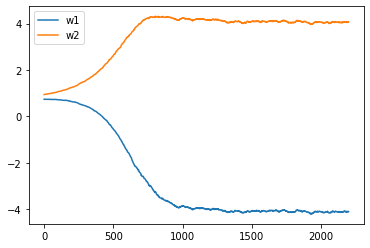

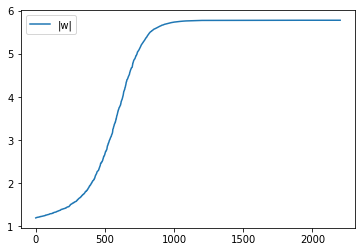

In [29]:
#3) Implement Oja rule
w = np.random.rand(2)*2 - 1 

alpha = 0.03
eta = 0.01
threshold = 1e-3
epochs = 1000

w_hist = w
wold = w

for N in range (epochs):
    if N % (epochs/10) == 0:
        print(f"Epoch {N} of {epochs}")

    uu = np.random.permutation(u)  

    for i in range (len(uu)):
        v = linear_model(uu[i], w)
        w = w + eta*v*uu[i] - alpha*eta*(v**2)*w

        w_hist = np.vstack((w_hist, w))
    
    if np.linalg.norm(w-wold) < threshold:
        print('Stop')
        break
    wold = w

w1 = (np.transpose(w_hist))[0]
print('w1',w1)
w2 = (np.transpose(w_hist))[1]
w_norm = np.sqrt(w1**2+w2**2)
t=np.arange(0,len(w1))


plt.figure()
plt.plot(t,w1, label='w1')
plt.plot(t,w2, label='w2')
plt.legend()

plt.figure()
plt.plot(t,w_norm, label='|w|')
plt.legend()
plt.show()




[[ 0.32640973 -0.25904598]
 [-0.25904598  0.321666  ]]


 max eigvect [ 0.71033647 -0.70386228]
0.7103364653931533


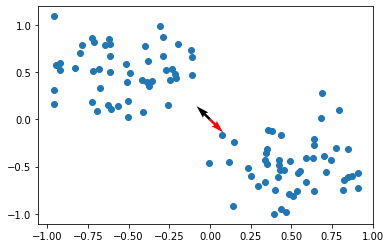

In [30]:
#P1
u1 = (np.transpose(u))[0]
u2 = (np.transpose(u))[1]
plt.scatter(u1,u2)
plt.quiver(*w)


Q = np.array([[0,0], [0,0]])
for i in range (len(u)):
     Q = Q + np.outer(u[i],u[i])

Q = Q/len(u)

print(Q)
eig_val, eig_vec = np.linalg.eig(Q)
#print(eig_val)
n = np.argmax(eig_val)
max_eigvect = eig_vec[:,n]
print('\n\n max eigvect',max_eigvect)

print(max_eigvect[0])
plt.quiver(max_eigvect[0], max_eigvect[1], color='red')

plt.show()

